In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster,mixture
from sklearn.datasets import make_blobs
from sklearn.neighbors import kneighbors_graph
%matplotlib inline

In [2]:
data = pd.read_csv('Rat_Sightings.csv')

In [3]:
data = data.iloc[:, 24:26]

Esse é um jeito de plotar

In [4]:
#pega os dados do data set
list1=list(data['X Coordinate (State Plane)'])
list2=list(data['Y Coordinate (State Plane)'])

#transforma os dados em uma lista conjunta
X = zip(list1,list2)
dt=np.dtype('int')
listaSemNaN=[]
X=list(X)

#remove dessa lista valores que causam erros por não serem numeros
for i in range(0,len(X)):
    tup=X[i]
    if((X[i][0] == X[i][0]) is False or (X[i][1] == X[i][1]) is False):
        nada = 0 #print "Não é NaN"
    else:
        listaSemNaN.append(tup)
        
#Transforma em um NP.Array para realizar contas matematicas da blibioteca numpy
X = np.array(listaSemNaN,dtype=dt)


In [19]:
num_cluster=3
neighbors=10

bandwidth=cluster.estimate_bandwidth(X,n_samples=1000)

# connectivity matrix for structured Ward
connectivity = kneighbors_graph(X,n_neighbors=neighbors, include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

meanshift = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
two_means = cluster.MiniBatchKMeans(n_clusters=num_cluster)
ward = cluster.AgglomerativeClustering(n_clusters=num_cluster, linkage='ward',connectivity=connectivity)
spectral = cluster.SpectralClustering(n_clusters=num_cluster, eigen_solver='arpack',affinity="nearest_neighbors")
avg_linkage = cluster.AgglomerativeClustering(linkage="average", affinity="cityblock",n_clusters=num_cluster,connectivity=connectivity)
birch = cluster.Birch(n_clusters=num_cluster)
gmm = mixture.GaussianMixture(n_components=num_cluster, covariance_type='full')
dbscan = cluster.DBSCAN()
affinity_propagation = cluster.AffinityPropagation()


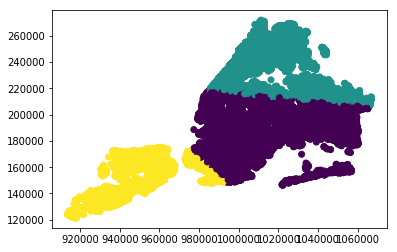

In [6]:
meanshift = meanshift.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=meanshift)

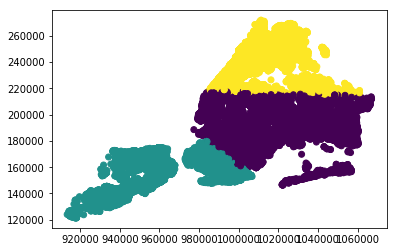

In [7]:
two_means = two_means.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=two_means)

In [8]:
#sem memoria suficiente Memory Error
#ward= ward.fit_predict(X)
#plt.scatter(X[:, 0], X[:, 1], c=ward)

In [9]:
#Warning sobre conectividade
#spectral = spectral.fit_predict(X)
#plt.scatter(X[:, 0], X[:, 1], c=spectral)

In [10]:
#Memory Error
#avg_linkage = avg_linkage.fit_predict(X)
#plt.scatter(X[:, 0], X[:, 1], c=avg_linkage)

In [11]:
#Memory Error
#birch = birch.fit_predict(X)
#plt.scatter(X[:,0],X[:,1],c=birch)

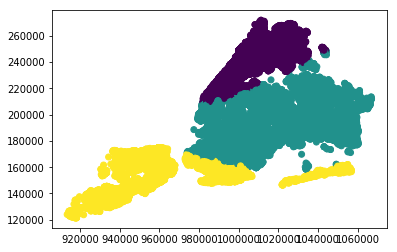

In [16]:
gmm = gmm.fit(X)
gmm = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=gmm)

In [18]:
#Memory Error
#affinity_propagation = affinity_propagation.fit_predict(X)
#plt.scatter(X[:,0],X[:,1],c=affinity_propagation)

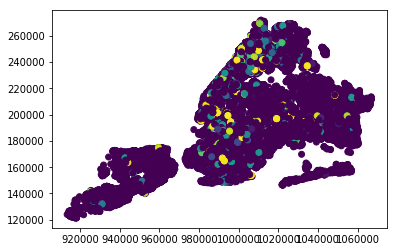

In [20]:
dbscan = dbscan.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=dbscan)